<a href="https://colab.research.google.com/github/IVMRanepa/AI-to-help-students-and-teachers/blob/main/Virtual_assistants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Виртуальные ассистенты**

Внедрение ИИ в помощь студентам и преподавателям, предоставляя мгновенную информацию, советы и автоматизацию рутинных задач. Предложить решения на Python 3 (c комментариями кода, с визуализацией данных)
Создание виртуального ассистента на Python 3, который будет помогать студентам и преподавателям, может включать такие функции, как предоставление информации, ответы на вопросы, а также базовую визуализацию данных. Вот пример кода для создания простого чат-бота с базовыми функциями, а также использование библиотеки matplotlib для визуализации данных:

Виртуальный ассистент: Привет! Задайте мне вопрос или скажите 'визуализация' для отображения данных.


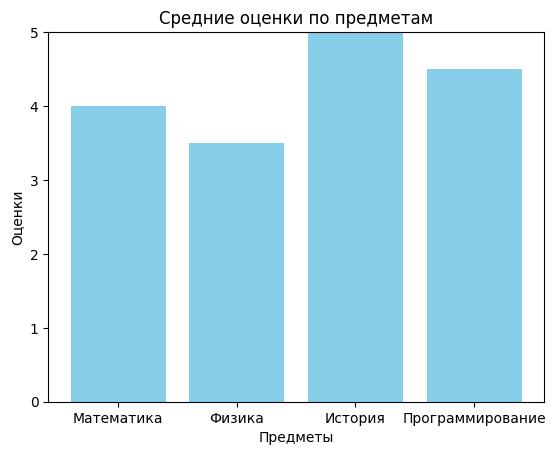

In [ ]:
import random
import matplotlib.pyplot as plt

# Функция-бот для ответа на вопросы
def virtual_assistant(query):
    responses = {
        "привет": "Привет! Чем могу помочь?",
        "расписание": "Ваше расписание доступно на университетском портале.",
        "оценки": "Средний балл за последний семестр: 4.5.",
        "пока": "До свидания! Удачи в обучении!"
    }
    return responses.get(query.lower(), "Извините, я не понял ваш вопрос.")

# Пример визуализации данных
def visualize_grades():
    subjects = ['Математика', 'Физика', 'История', 'Программирование']
    grades = [4.0, 3.5, 5.0, 4.5]

    plt.bar(subjects, grades, color='skyblue')
    plt.title('Средние оценки по предметам')
    plt.xlabel('Предметы')
    plt.ylabel('Оценки')
    plt.ylim(0, 5)  # Оценки по пятибалльной шкале
    plt.show()

# Интерфейс для взаимодействия
if __name__ == "__main__":
    print("Виртуальный ассистент: Привет! Задайте мне вопрос или скажите 'визуализация' для отображения данных.")
    while True:
        user_input = input("Вы: ")
        if user_input.lower() == "визуализация":
            visualize_grades()
        elif user_input.lower() in ["пока", "выход"]:
            print("Виртуальный ассистент: Пока!")
            break
        else:
            print("Виртуальный ассистент:", virtual_assistant(user_input))

Описание кода:
1.	Ответы на запросы: Используется словарь responses, чтобы сопоставить запросы с заранее подготовленными ответами.
2.	Визуализация данных: Функция visualize_grades создает гистограмму с помощью библиотеки matplotlib.
3.	Взаимодействие с пользователем: Простой интерфейс на основе команд input и print позволяет взаимодействовать с ботом.
Этот пример можно расширить, добавив API-интеграции, поддержку естественного языка с помощью библиотеки nltk или transformers, а также более сложные алгоритмы анализа данных. Это простой старт для демонстрации возможностей!

Добавление машинного обучения (ML) к вашему виртуальному ассистенту сделает его гораздо умнее и функциональнее! Вот несколько шагов, чтобы интегрировать ML в проект:
2. Использование обработки естественного языка (NLP)
Чтобы ваш ассистент понимал текстовые запросы и отвечал на них более осмысленно, можно применить библиотеку, такую как scikit-learn или transformers. Пример кода ниже демонстрирует использование модели из библиотеки transformers для обработки запросов:

In [ ]:
from transformers import pipeline

# Загрузка модели машинного обучения для обработки языка
nlp_model = pipeline("question-answering")

# Пример базы знаний
context = """
    Виртуальный ассистент может анализировать запросы и предоставлять информацию о расписании,
    оценках, а также отображать визуализации данных.
"""

# Функция для ответа на вопросы с использованием модели
def answer_question(question):
    result = nlp_model(question=question, context=context)
    return result['answer']

# Пример запроса
user_question = "Что может делать виртуальный ассистент?"
print("Ответ:", answer_question(user_question))

Объяснение:
*	Используется модель для извлечения ответов из контекста.
*	Функция берет на себя обработку запросов на основе базы знаний.

**3. Классификация запросов**

Чтобы ассистент распознавал типы запросов (например, "визуализация" или "расписание"), можно обучить классификатор запросов. Пример с scikit-learn:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Обучающие данные
queries = ["покажи оценки", "что в расписании", "создай график", "анализ данных"]
labels = ["оценки", "расписание", "визуализация", "анализ"]

# Векторизация текста
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(queries)

# Обучение модели
model = MultinomialNB()
model.fit(X, labels)

# Классификация нового запроса
def classify_query(query):
    X_new = vectorizer.transform([query])
    return model.predict(X_new)[0]

# Пример
user_input = "покажи мне график оценок"
print("Тип запроса:", classify_query(user_input))

**Объяснение:**
*	Используется наивный байесовский классификатор для определения категории запроса.
*	Этот подход подходит для небольших наборов данных.

**3. Визуализация на основе прогнозов**

Для создания более продвинутой визуализации, можно включить регрессию или кластеризацию. Например, прогнозирование оценок студента:

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Данные: часы учебы и оценки
hours = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
grades = np.array([2.5, 3.0, 3.5, 4.0, 4.5])

# Модель регрессии
model = LinearRegression()
model.fit(hours, grades)

# Прогноз
future_hours = np.array([6, 7, 8]).reshape(-1, 1)
predicted_grades = model.predict(future_hours)

# Визуализация
plt.scatter(hours, grades, color="blue", label="Фактические данные")
plt.plot(future_hours, predicted_grades, color="green", label="Прогноз")
plt.title("Прогноз оценок на основе времени обучения")
plt.xlabel("Часы учебы")
plt.ylabel("Оценки")
plt.legend()
plt.show()

**Объяснение:**
*	Линейная регрессия используется для прогнозирования оценок на основе времени обучения.
*	Результаты визуализируются в графике.

Интеграция машинного обучения позволяет значительно расширить функционал вашего ассистента: от предсказания оценок до понимания контекста запросов.

**4. Чат-бот с использованием OpenAI API**

Можно интегрировать GPT-модель через OpenAI API, чтобы ассистент понимал запросы на естественном языке. Пример простого кода: